In [1]:
!pip install missingno

In [2]:
import pandas as pd
import missingno as msno
data=pd.read_csv('titanic.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

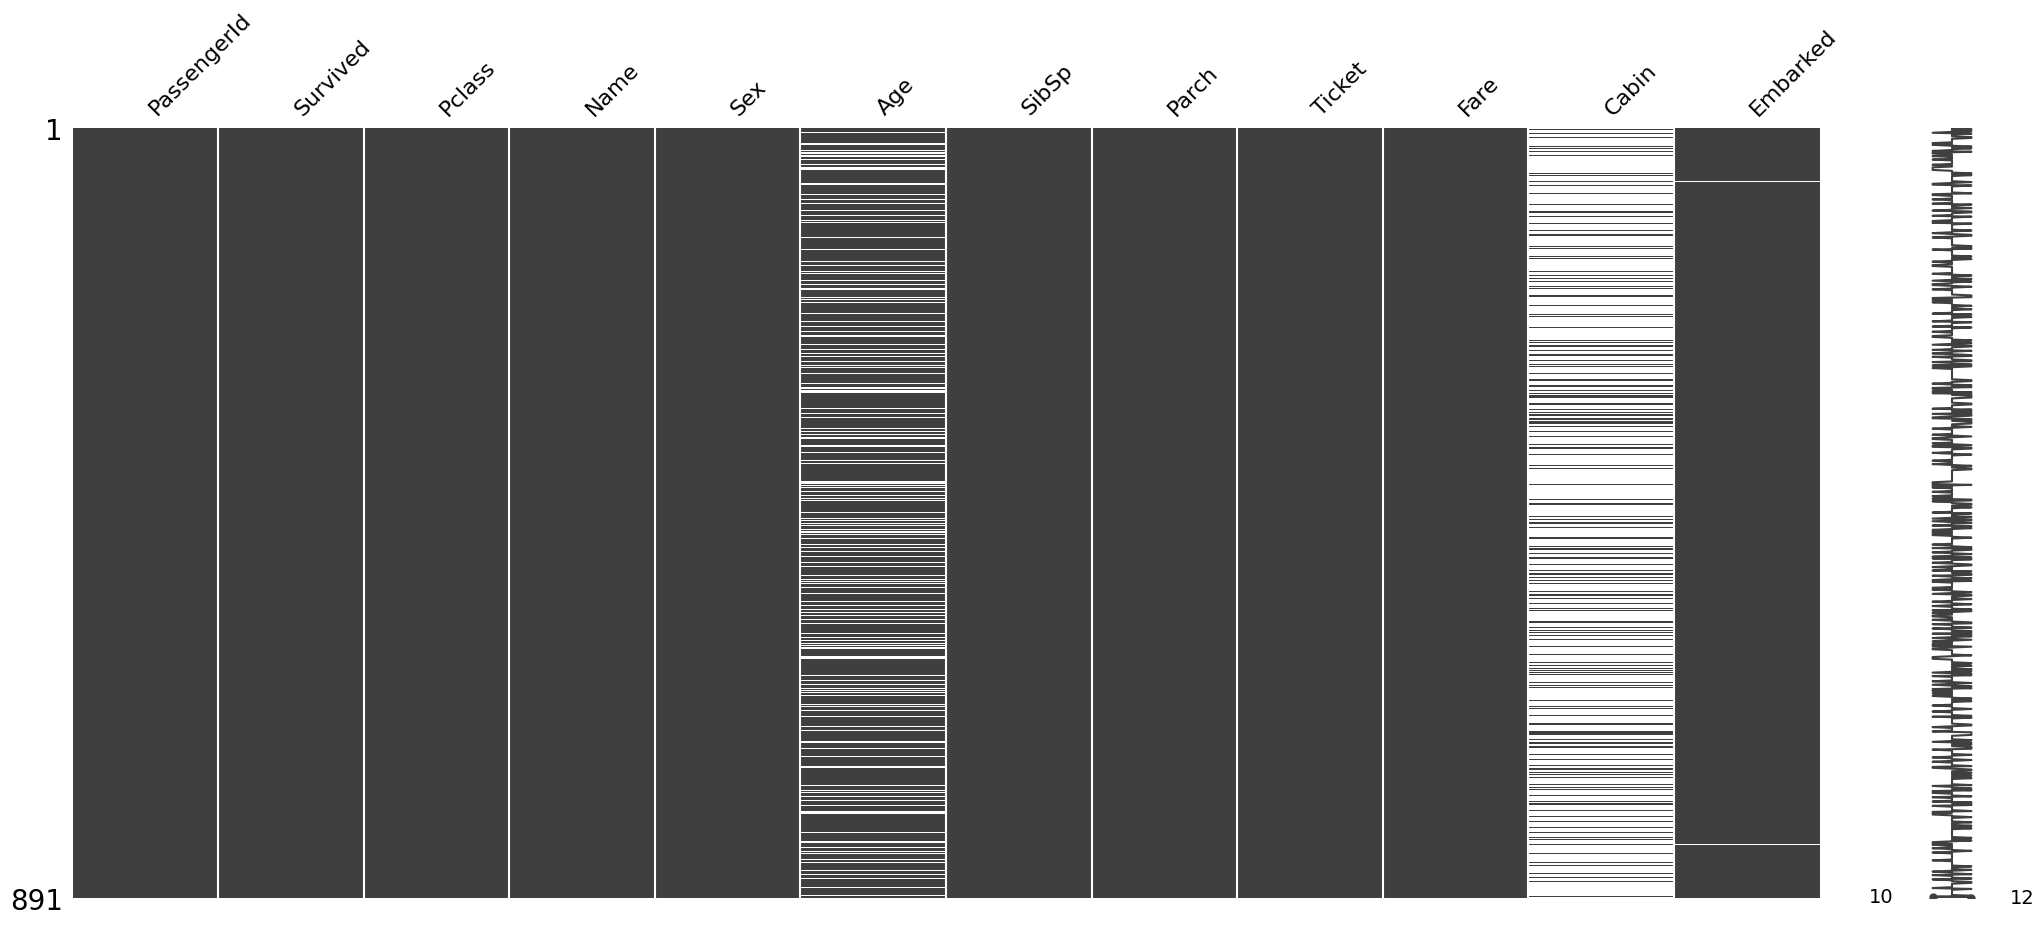

In [3]:
msno.matrix(data)

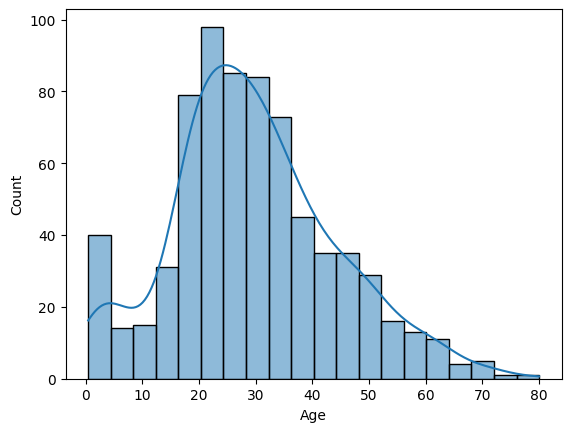

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data=data,x='Age',kde=True)
plt.show()

In [5]:
data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
data.drop(['PassengerId','Name','Ticket','Fare'],axis=1,inplace=True)
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Cabin',
       'Embarked'],
      dtype='object')

In [8]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
sm=SimpleImputer(strategy='median') 
le=LabelEncoder()
data['Embarked']=le.fit_transform(data[['Embarked']])
si=SimpleImputer(strategy='most_frequent')data.head()
data['Age']=sm.fit_transform(data[['Age']])
data['Embarked']=si.fit_transform(data[['Embarked']])

data['Sex']=le.fit_transform(data[['Sex']])

C:\Users\itzsh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\itzsh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
ss=SimpleImputer(strategy='most_frequent')
data['Cabin']=le.fit_transform(data[['Cabin']])
data['Cabin']=ss.fit_transform(data[['Cabin']])

C:\Users\itzsh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,0,3,1,22.0,1,0,147,2
1,1,1,0,38.0,1,0,81,0
2,1,3,0,26.0,0,0,147,2
3,1,1,0,35.0,1,0,55,2
4,0,3,1,35.0,0,0,147,2


In [12]:
from sklearn.feature_selection import SelectKBest,chi2,mutual_info_classif
X=data.drop('Survived',axis=1)
Y=data['Survived']

In [13]:
skbest=SelectKBest(chi2,k='all').fit(X,Y).scores_
minfo=mutual_info_classif(X,Y)
missing_value_ratio=X.isnull().sum()/len(X)
feature_selection=pd.DataFrame({
    'Features':X.columns,
    'chi2':skbest,
    'minfo':minfo,
    'missing_ratio':missing_value_ratio
})
feature_selection

,Features,chi2,minfo,missing_ratio
Pclass,Pclass,30.873699,0.070968,0.0
Sex,Sex,92.702447,0.152778,0.0
Age,Age,21.649163,0.028461,0.0
SibSp,SibSp,2.581865,0.020023,0.0
Parch,Parch,10.097499,0.000000,0.0
Cabin,Cabin,573.925858,0.061494,0.0
Embarked,Embarked,9.755456,0.000000,0.0


In [14]:
!pip install skfeature-chappers

In [15]:
from skfeature.function.similarity_based import fisher_score
import numpy as np
fscore=fisher_score.fisher_score(X.to_numpy(),Y.to_numpy())
feature_fisherscore=sorted(zip(X.columns,fscore),key=lambda x:x[1],reverse=True)
feature_fisherscore

[('Sex', np.int64(6)),
 ('Pclass', np.int64(5)),
 ('Cabin', np.int64(4)),
 ('Embarked', np.int64(3)),
 ('Parch', np.int64(2)),
 ('Age', np.int64(1)),
 ('SibSp', np.int64(0))]

In [16]:
!pip install mlxtend

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.metrics import accuracy_score

In [18]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,
                                               random_state=42)

In [19]:
log_reg=LogisticRegression(max_iter=1000,random_state=42)

In [24]:
skf=SFS(estimator=log_reg,n_features_to_select='auto',
       direction='forward',scoring='accuracy',cv=5)

In [25]:
skf=skf.fit(X_train,Y_train)

In [26]:
skf.n_features_to_select_

np.int64(3)

In [27]:
print(X_train.columns)
print(skf.support_)

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Cabin', 'Embarked'], dtype='object')
[ True  True False  True False False False]


In [28]:
print(skf.n_features_in_)

7


In [29]:
efs=EFS(estimator=log_reg,min_features=1,
       max_features=X_train.shape[1],
       scoring='accuracy',
       cv=5)
efs=efs.fit(X_train,Y_train)

Features: 127/127

In [30]:
efs.best_feature_names_

('Pclass', 'Sex', 'SibSp', 'Parch')

In [31]:
efs.best_score_

np.float64(0.8005220131980696)

In [32]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs=SFS(estimator=log_reg,
                             k_features='best',
                             forward=True,
                             floating=False,
                             scoring='accuracy',
                             cv=5)
sfs=sfs.fit(X_train,Y_train)
sfs.k_feature_names_

('Pclass', 'Sex', 'SibSp', 'Parch')